# <p style="text-align: center;"> Data Insights  </p>
### In this notebook, i will inspect the current customersdata and get insights and valuable information from it.<br><br>Then, i will apply Kmeans algorithm to the  data to  generate clusters, this will help us understand the data more.<br><br>Finally, i will do some EDA  to the potential new costumers data set ,then choose which costumers the marketing team might want to target.

In [1]:
###Importing needed packages
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import seaborn as sns
import pickle
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use(['ggplot'])

## 1--Current_Customers_Analysis

### 1-1-EDA On The current Costumers Data 

In [2]:
# Getting the data
Customer_demographic=pd.read_csv("Cleaned_Customer_demographic_data.csv")

In [3]:
Customer_demographic.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,0,1,Laraine,Medendorp,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0
1,1,2,Eli,Bockman,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0
2,2,3,Arlin,Dearle,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15.0
3,3,4,Talbot,LN_unkown,Male,33,1961-10-03,IT,Mass Customer,N,No,7.0
4,4,6,Curr,Duckhouse,Male,35,1966-09-16,Retail,High Net Worth,N,Yes,13.0


In [4]:
# this column is useless we will drop it
Customer_demographic.drop('Unnamed: 0', axis = 1,inplace = True)
Customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,LN_unkown,Male,33,1961-10-03,IT,Mass Customer,N,No,7.0
4,6,Curr,Duckhouse,Male,35,1966-09-16,Retail,High Net Worth,N,Yes,13.0


#### Function that will calculate the age :

In [5]:
def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))



In [6]:
# calculate the age , creating a new column for it name " age ", and dropping the 'DOB' column
Customer_demographic['age'] = Customer_demographic['DOB'].apply(calculate_age)
Customer_demographic.drop('DOB', axis = 1,inplace = True)
Customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,Health,Mass Customer,N,Yes,11.0,67
1,2,Eli,Bockman,Male,81,Financial Services,Mass Customer,N,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,Property,Mass Customer,N,Yes,15.0,66
3,4,Talbot,LN_unkown,Male,33,IT,Mass Customer,N,No,7.0,59
4,6,Curr,Duckhouse,Male,35,Retail,High Net Worth,N,Yes,13.0,54


#### The method describe is used to get general stats about the data 

In [7]:
Customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,3344.000000,3344.000000,3344.000000,3344.000000
mean,1987.077153,48.861842,10.722751,42.658194
std,1155.560393,28.693185,5.613716,12.656585
min,1.000000,0.000000,1.000000,18.000000
25%,983.750000,24.000000,6.000000,33.000000
50%,1981.000000,48.000000,10.722751,43.000000
75%,2989.250000,73.000000,15.000000,52.000000
max,3999.000000,99.000000,22.000000,176.000000


#### The column age has a maximum value of 176 , we will delete the row that contains this value.

In [8]:
Customer_demographic[Customer_demographic['age']==176]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
26,34,Jephthah,Bachmann,U,59,IT,Affluent Customer,N,No,20.0,176


In [9]:
# dropping the whole row 
Customer_demographic.drop([Customer_demographic.index[26]],inplace=True)

In [10]:
# checking again
Customer_demographic.describe()


,customer_id,past_3_years_bike_related_purchases,tenure,age
count,3343.000000,3343.000000,3343.000000,3343.000000
mean,1987.661382,48.858809,10.719976,42.618307
std,1155.239218,28.696942,5.612261,12.446498
min,1.000000,0.000000,1.000000,18.000000
25%,984.500000,24.000000,6.000000,33.000000
50%,1982.000000,48.000000,10.722751,43.000000
75%,2989.500000,73.000000,15.000000,52.000000
max,3999.000000,99.000000,22.000000,88.000000


#### The stats are looking good now.

#### next we will check if there is any correlations between the columns:

In [11]:
Customer_demographic.corr()

,customer_id,past_3_years_bike_related_purchases,tenure,age
customer_id,1.000000,-0.001229,-0.023032,0.002394
past_3_years_bike_related_purchases,-0.001229,1.000000,-0.011734,-0.037394
tenure,-0.023032,-0.011734,1.000000,0.436519
age,0.002394,-0.037394,0.436519,1.000000


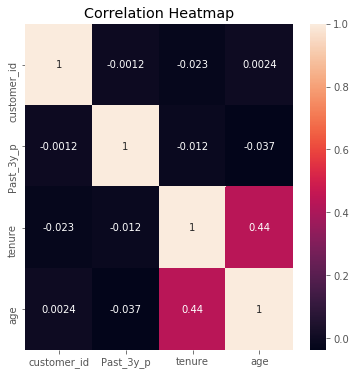

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
Customer_demographic.rename(index=str,columns={"past_3_years_bike_related_purchases":"Past_3y_p"},inplace=True)
sns.heatmap(Customer_demographic.corr(), annot=True);
plt.title('Correlation Heatmap');

#### The correlations are really low and we can't rely on them.

#### The columns age and tenure have 0.44 correlation, let's use a scatter plot to visualize this relationship :

In [13]:
# data frame that contains age and tenure
age_tenure= Customer_demographic.loc[:,["age", "tenure"]] 

In [14]:
age_tenure

,age,tenure
0,67,11.000000
1,39,16.000000
2,66,15.000000
3,59,7.000000
4,54,13.000000
...,...,...
3339,44,14.000000
3340,45,19.000000
3341,19,1.000000
3342,43,10.722751


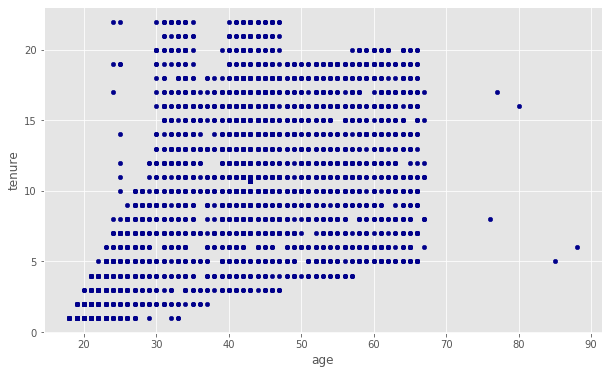

In [15]:
# creating a scater plot for age and tenure
age_tenure.plot(kind='scatter', x='age', y='tenure', figsize=(10, 6), color='darkblue')
plt.show()

#### We can see the correlation , but it's not one that we can rely on .

#### Next, let's check the gender distribution:

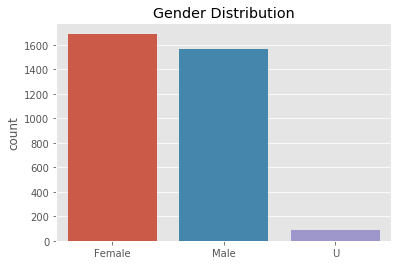

In [16]:
sns.countplot(x='gender', data=Customer_demographic);
plt.title('Gender Distribution');
plt.xlabel(None);

#### The customers are distributed almost equally gender wise.

#### Car ownership:

Text(0.5, 0, '')

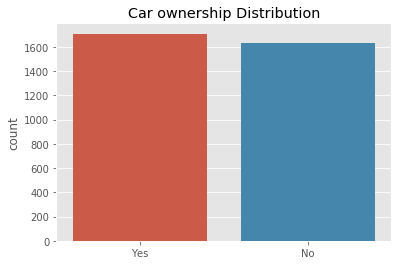

In [17]:
sns.countplot(x='owns_car', data=Customer_demographic);
plt.title('Car ownership Distribution');
plt.xlabel(None)

#### This is surprising! most people think that it's people without cars that buy bikes more , but in this particular dataset, we discover that this is not true at all !<br><br>Let's see if the gender has a role in this:

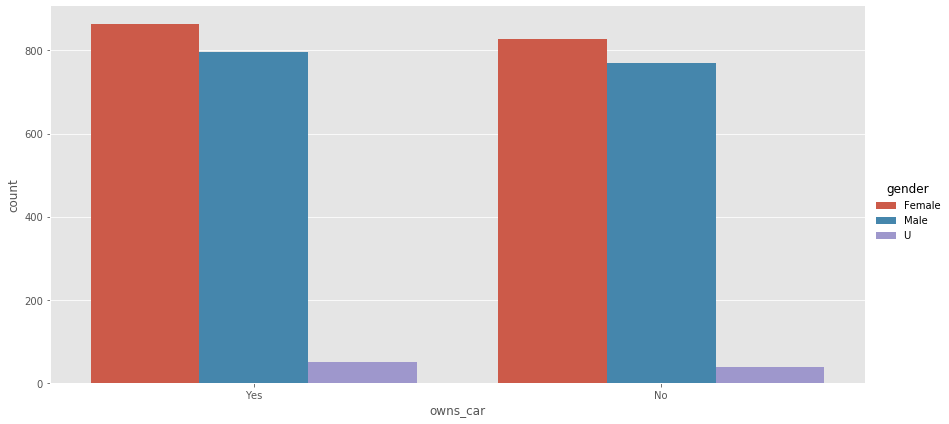

In [18]:
g = sns.catplot(x="owns_car", hue="gender",
                data=Customer_demographic, kind="count",
                height=6, aspect=2);

#### Apparantly it doesn't .

#### Wealth segment :

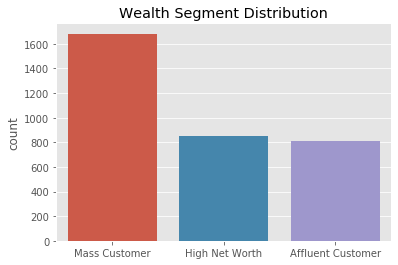

In [19]:
sns.countplot(x='wealth_segment', data=Customer_demographic);
plt.title('Wealth Segment Distribution');
plt.xlabel(None);

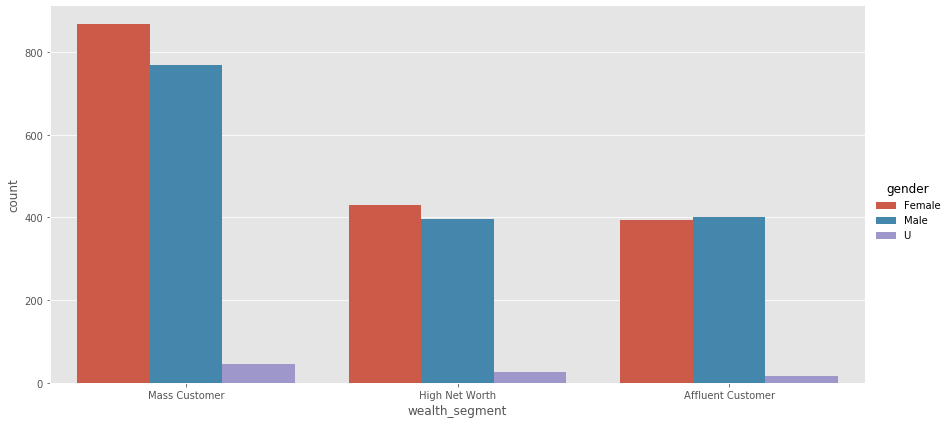

In [20]:
g = sns.catplot(x="wealth_segment", hue="gender",
                data=Customer_demographic, kind="count",
                height=6, aspect=2);

#### Almost half of the customsers are from the "Mass customer" segment !

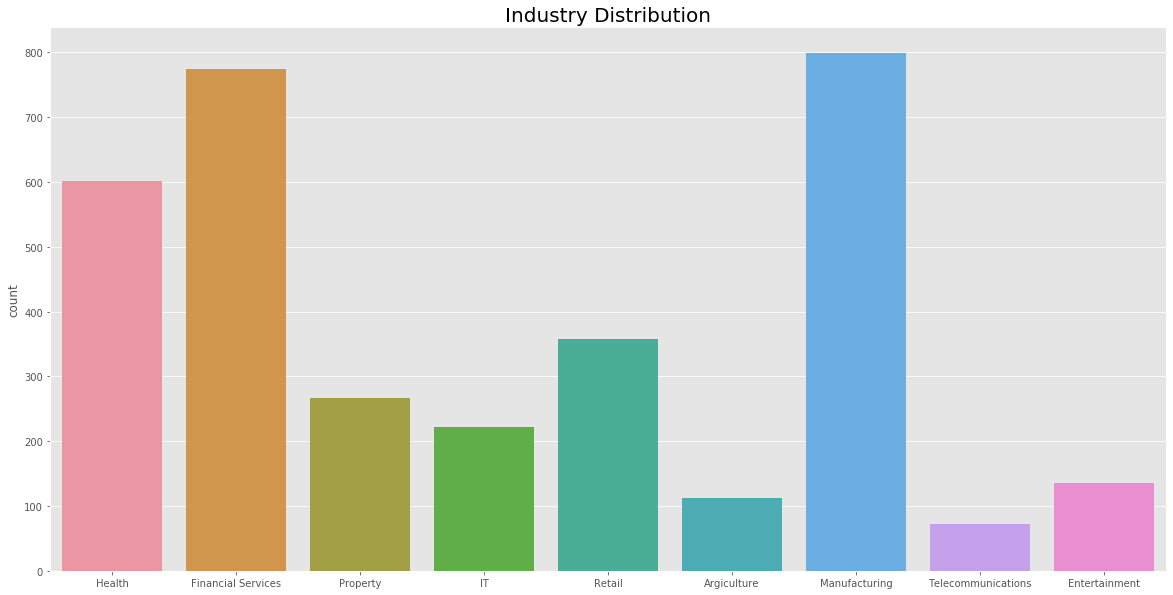

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='job_industry_category', data=Customer_demographic);
plt.title('Industry Distribution',fontsize=20);
plt.xlabel(None);

#### A big proportion of the customers work in the following industries : Manufacturing-Financial Services-Health-Retail !

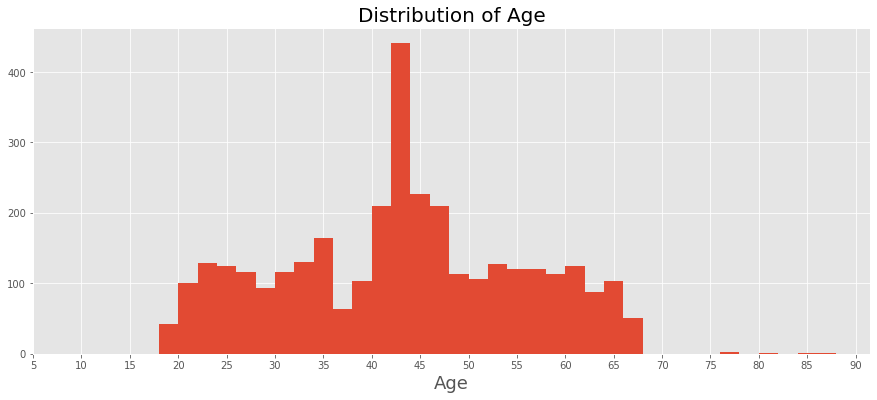

In [22]:
ticks=[]
for k in range(1,19):
    x=k*5
    ticks.append(x)
    
Customer_demographic.hist('age', bins=35,figsize=(15,6));
plt.xticks(ticks)  # Set locations and labels
plt.title('Distribution of Age',fontsize=20);
plt.xlabel('xlabel', fontsize=18)
plt.xlabel('Age');

#### From the histogram, we notice that the majority of the clients are aged between 38 and 56!<br><br>Let's see if the gender affects the distribution :

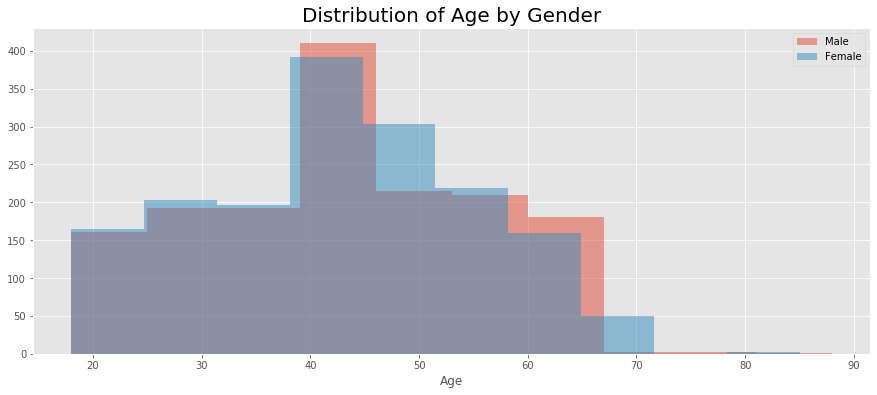

In [23]:
plt.figure(figsize=(15,6));
plt.hist('age', data=Customer_demographic[Customer_demographic['gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('age', data=Customer_demographic[Customer_demographic['gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender',fontsize=20);
plt.xlabel('Age');
plt.legend();

#### The distribution doesn't change!

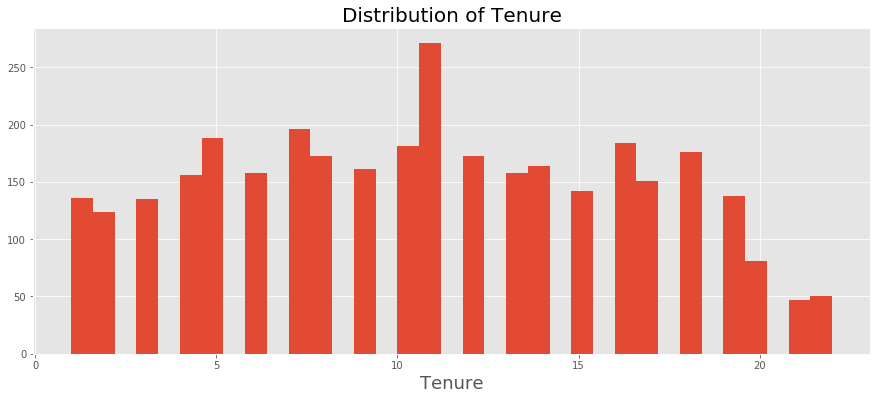

In [24]:
Customer_demographic.hist('tenure', bins=35,figsize=(15,6));

plt.title('Distribution of Tenure',fontsize=20);
plt.xlabel('Tenure', fontsize=18);


#### The most common value for tenure are between 5 and 15.

### 1-2-Preparing data for model building

In [25]:
#this columns won't be used in modeling
Modeling_Customer_demographic = Customer_demographic.drop(['customer_id','first_name','last_name','deceased_indicator'], axis=1)

In [26]:
Modeling_Customer_demographic.head()

,gender,Past_3y_p,job_industry_category,wealth_segment,owns_car,tenure,age
0,Female,93,Health,Mass Customer,Yes,11.0,67
1,Male,81,Financial Services,Mass Customer,Yes,16.0,39
2,Male,61,Property,Mass Customer,Yes,15.0,66
3,Male,33,IT,Mass Customer,No,7.0,59
4,Male,35,Retail,High Net Worth,Yes,13.0,54


In [27]:
#Handling Categorical Data:
Modeling_Customer_demographic['gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

In [28]:
Modeling_Customer_demographic['owns_car'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)

In [29]:
#dropping rows with unkown gender
Modeling_Customer_demographic= Modeling_Customer_demographic[Modeling_Customer_demographic.gender != "U"]
Customer_demographic_cleaned = Modeling_Customer_demographic  ## we will add cluster labels to this data frame 
                                                              ##when the modeling phase is done 

In [30]:
# one hot encoding
Modeling_Customer_demographic= pd.concat([Modeling_Customer_demographic,pd.get_dummies(Modeling_Customer_demographic['job_industry_category'])], axis=1)
Modeling_Customer_demographic.drop(['Telecommunications','Argiculture','Entertainment','IT'], axis = 1,inplace=True)
Modeling_Customer_demographic= pd.concat([Modeling_Customer_demographic,pd.get_dummies(Modeling_Customer_demographic['wealth_segment'])], axis=1)
Modeling_Customer_demographic.drop(['job_industry_category','wealth_segment'], axis = 1,inplace=True)
Modeling_Customer_demographic.head()

,gender,Past_3y_p,owns_car,tenure,age,Financial Services,Health,Manufacturing,Property,Retail,Affluent Customer,High Net Worth,Mass Customer
0,1,93,0,11.0,67,0,1,0,0,0,0,0,1
1,0,81,0,16.0,39,1,0,0,0,0,0,0,1
2,0,61,0,15.0,66,0,0,0,1,0,0,0,1
3,0,33,1,7.0,59,0,0,0,0,0,0,0,1
4,0,35,0,13.0,54,0,0,0,0,1,0,1,0


In [31]:
#normalizing data:
from sklearn.preprocessing import StandardScaler
X = Modeling_Customer_demographic.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
### this is the data that we'll use for the first model.
Clus_dataSet

array([[ 0.96261478,  1.52890506, -0.98113612, ..., -0.56789262,
        -0.58302461,  0.99509801],
       [-1.03883715,  1.11154641, -0.98113612, ..., -0.56789262,
        -0.58302461,  0.99509801],
       [-1.03883715,  0.41594865, -0.98113612, ..., -0.56789262,
        -0.58302461,  0.99509801],
       ...,
       [ 0.96261478, -1.42738538,  1.01922657, ..., -0.56789262,
        -0.58302461,  0.99509801],
       [ 0.96261478,  1.32022573, -0.98113612, ..., -0.56789262,
         1.71519346, -1.00492614],
       [-1.03883715, -1.32304572, -0.98113612, ...,  1.76089627,
        -0.58302461, -1.00492614]])

#### Let's see what your data points look like in a 3D graph :

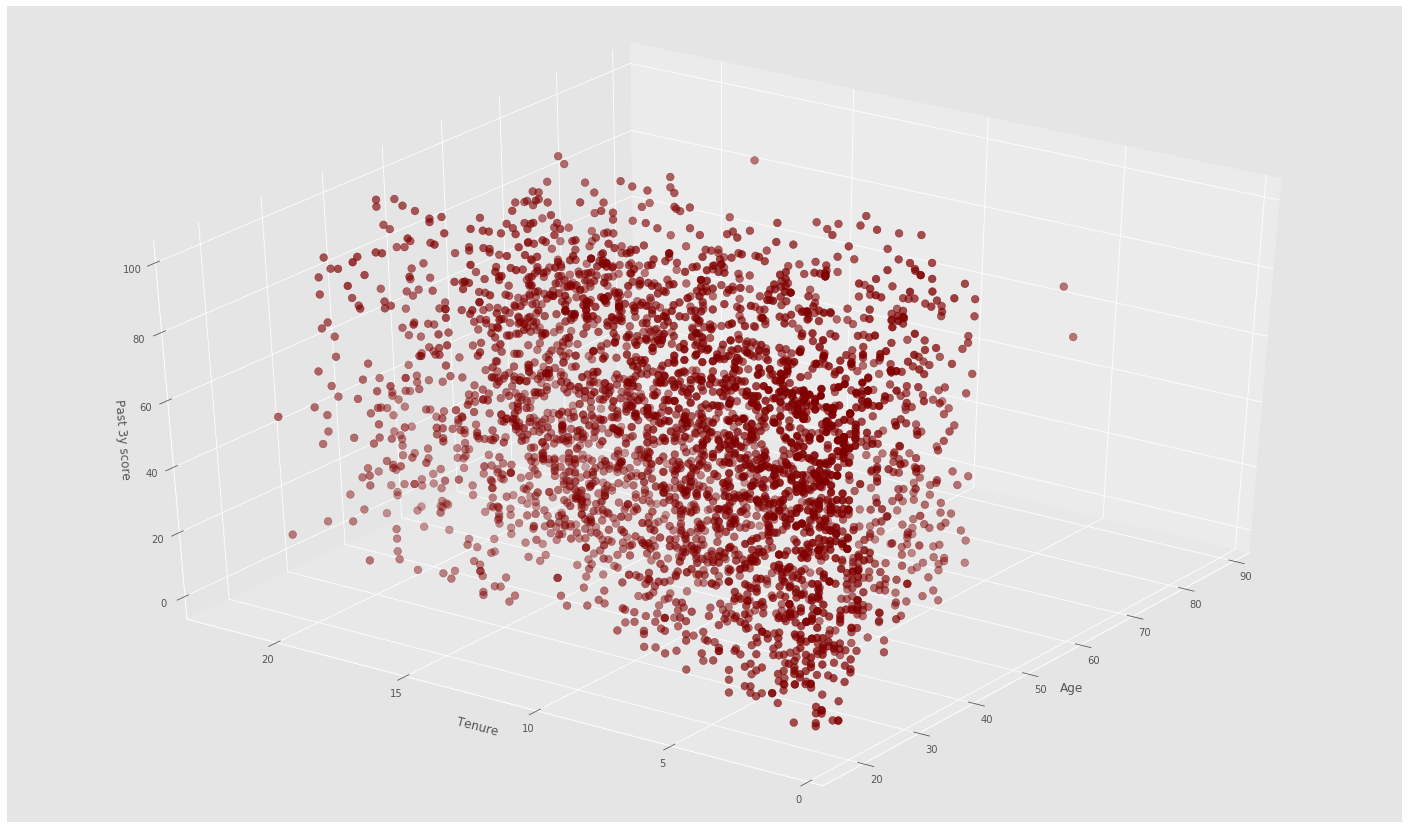

In [32]:
### we'll use the columns Tenure,Age and Past_3y_p to visualize the data.
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Modeling_Customer_demographic.age, Modeling_Customer_demographic.tenure, Modeling_Customer_demographic.Past_3y_p, c='maroon', s=60)
ax.view_init(35, 215)
plt.xlabel("Age")
plt.ylabel("Tenure")
ax.set_zlabel('Past 3y score')
plt.show()

### 1-3-Model Building

#### We know that categorical columns shoudln't be included in the input of a kmeans model, but just for experimentation, we will build two models, one with all of the columns , and the second model with only Past_3y_p, tenure and age, and we will visiualize the results of  each model.

### 1-3-1-First model : Using all the columns

#### Finding the best k for our data using the elbow method:

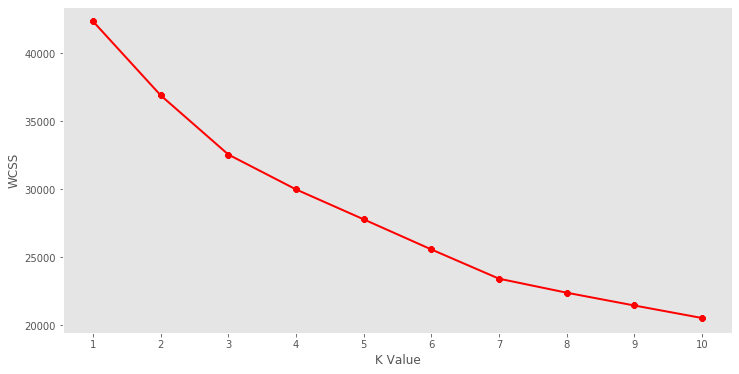

In [33]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Clus_dataSet)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#### From the graph, Our optimal k is aroud  4<br><br>Now let's the create the model and set the number of clusters to 4:

In [34]:
km = KMeans(n_clusters=4,random_state=0)
clusters = km.fit_predict(Clus_dataSet)
Modeling_Customer_demographic["Clus_km"] = clusters # assigning the clusters labels to the dataframe
clusters

array([1, 1, 1, ..., 1, 3, 2])

In [35]:
Modeling_Customer_demographic.head()

,gender,Past_3y_p,owns_car,tenure,age,Financial Services,Health,Manufacturing,Property,Retail,Affluent Customer,High Net Worth,Mass Customer,Clus_km
0,1,93,0,11.0,67,0,1,0,0,0,0,0,1,1
1,0,81,0,16.0,39,1,0,0,0,0,0,0,1,1
2,0,61,0,15.0,66,0,0,0,1,0,0,0,1,1
3,0,33,1,7.0,59,0,0,0,0,0,0,0,1,1
4,0,35,0,13.0,54,0,0,0,0,1,0,1,0,0


#### Now let's visualize the clusters in a 3D graph :

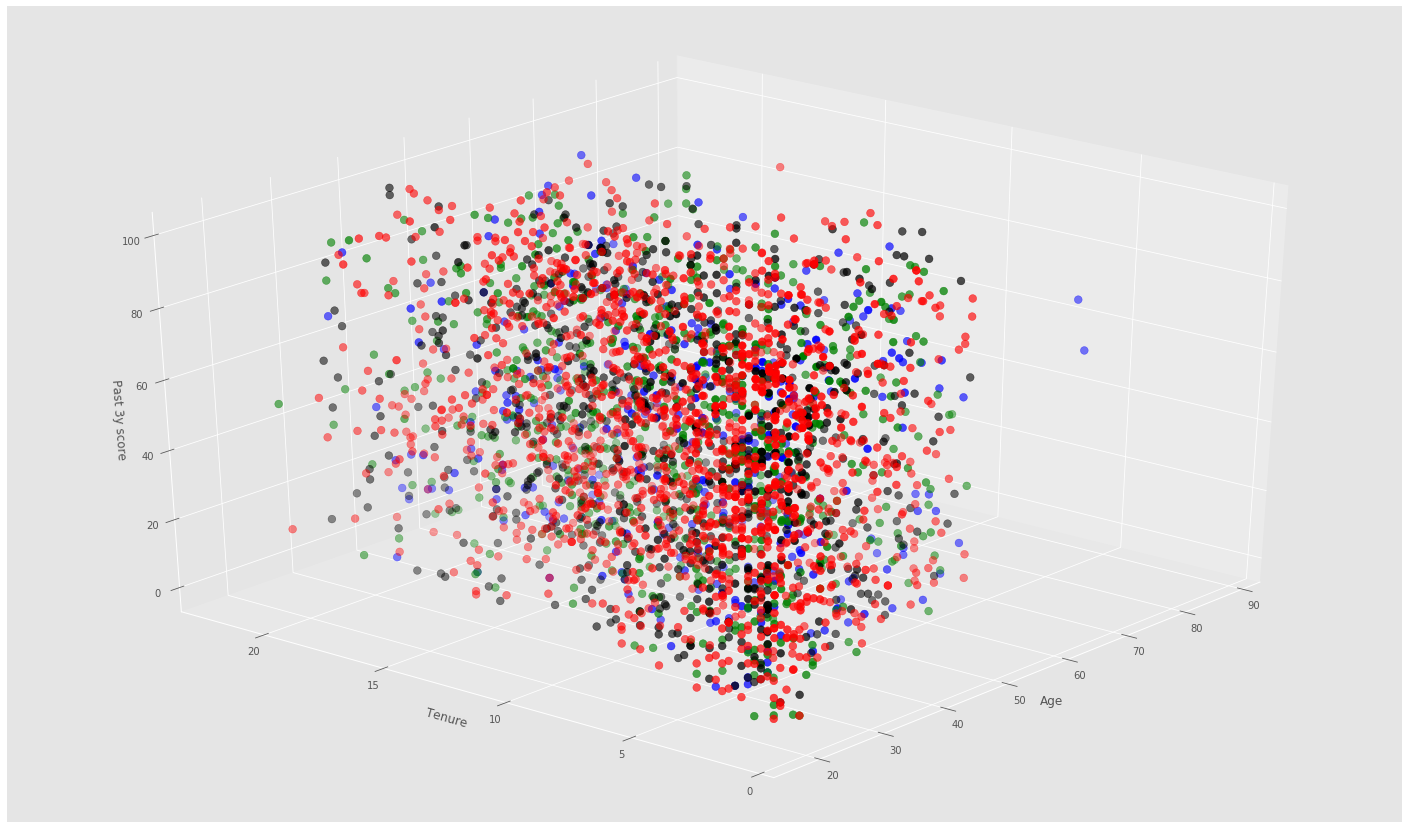

In [36]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Modeling_Customer_demographic.age[Modeling_Customer_demographic.Clus_km == 0], Modeling_Customer_demographic["tenure"][Modeling_Customer_demographic.Clus_km == 0], Modeling_Customer_demographic["Past_3y_p"][Modeling_Customer_demographic.Clus_km == 0], c='blue', s=60)
ax.scatter(Modeling_Customer_demographic.age[Modeling_Customer_demographic.Clus_km == 1], Modeling_Customer_demographic["tenure"][Modeling_Customer_demographic.Clus_km == 1], Modeling_Customer_demographic["Past_3y_p"][Modeling_Customer_demographic.Clus_km == 1], c='red', s=60)
ax.scatter(Modeling_Customer_demographic.age[Modeling_Customer_demographic.Clus_km == 2], Modeling_Customer_demographic["tenure"][Modeling_Customer_demographic.Clus_km == 2], Modeling_Customer_demographic["Past_3y_p"][Modeling_Customer_demographic.Clus_km == 2], c='green', s=60)
ax.scatter(Modeling_Customer_demographic.age[Modeling_Customer_demographic.Clus_km == 3], Modeling_Customer_demographic["tenure"][Modeling_Customer_demographic.Clus_km == 3], Modeling_Customer_demographic["Past_3y_p"][Modeling_Customer_demographic.Clus_km == 3], c='black', s=60)
ax.view_init(30, 220)
plt.xlabel("Age")
plt.ylabel("Tenure")
ax.set_zlabel('Past 3y score')
plt.show()

#### From the graph above, it's obvious that including categorical columns in kmeans modeling results in chaos results.<br>The standard k-means algorithm isn't directly applicable to categorical data, for various reasons. The sample space for categorical data is discrete, and doesn't have a natural origin. An Euclidean distance function on such a space isn't really meaningful. <br>This model will be abandoned.<br><br>Now let's move on and build the second model.

### 1-3-2-Second Model: Using only numeric columns

#### Now, we will use only the numeric columns as inputs :

In [37]:
#choosing only the numeric columns
Modeling_2_Customer_demographic=Modeling_Customer_demographic.loc[:,['Past_3y_p','tenure','age']]
Modeling_2_Customer_demographic.head()

,Past_3y_p,tenure,age
0,93,11.0,67
1,81,16.0,39
2,61,15.0,66
3,33,7.0,59
4,35,13.0,54


In [38]:
#normalizing the data
X2 = Modeling_2_Customer_demographic.values[:,0:]
X2 = np.nan_to_num(X2)
Clus_dataSet2 = StandardScaler().fit_transform(X2)
Clus_dataSet2 

array([[ 1.52890506,  0.04926195,  1.93438427],
       [ 1.11154641,  0.92863091, -0.28613884],
       [ 0.41594865,  0.75275712,  1.85507988],
       ...,
       [-1.42738538,  1.45625229,  0.18968754],
       [ 1.32022573, -1.70947598, -1.87222677],
       [-1.32304572, -0.12661185,  0.26899194]])

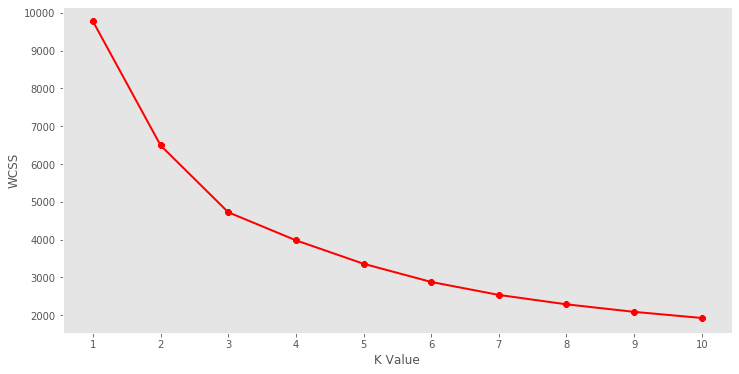

In [39]:
# using the elbow methob to find the best K for our model
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Clus_dataSet2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#### We'll build the new model with K=3

In [40]:
km2 = KMeans(n_clusters=3,random_state=0)
clusters2 = km2.fit_predict(Clus_dataSet2)
Modeling_2_Customer_demographic["Clus_km"] = clusters2

#### Now let's visualize the new clusters in a 3D graph :

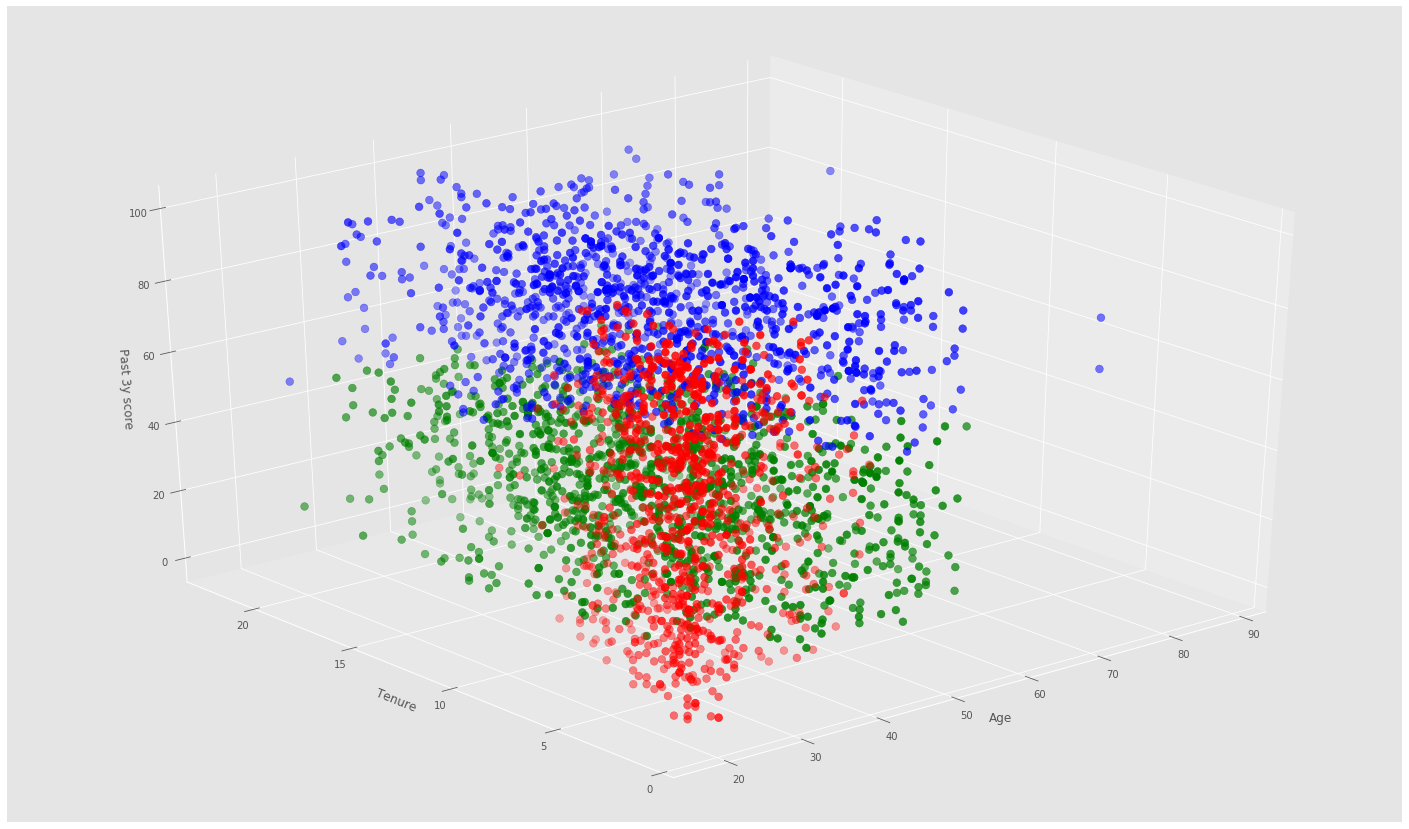

In [41]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Modeling_2_Customer_demographic.age[Modeling_2_Customer_demographic.Clus_km == 0], Modeling_2_Customer_demographic["tenure"][Modeling_2_Customer_demographic.Clus_km == 0], Modeling_2_Customer_demographic["Past_3y_p"][Modeling_2_Customer_demographic.Clus_km == 0], c='blue', s=60)
ax.scatter(Modeling_2_Customer_demographic.age[Modeling_2_Customer_demographic.Clus_km == 1], Modeling_2_Customer_demographic["tenure"][Modeling_2_Customer_demographic.Clus_km == 1], Modeling_2_Customer_demographic["Past_3y_p"][Modeling_2_Customer_demographic.Clus_km == 1], c='red', s=60)
ax.scatter(Modeling_2_Customer_demographic.age[Modeling_2_Customer_demographic.Clus_km == 2], Modeling_2_Customer_demographic["tenure"][Modeling_2_Customer_demographic.Clus_km == 2], Modeling_2_Customer_demographic["Past_3y_p"][Modeling_2_Customer_demographic.Clus_km == 2], c='green', s=60)

ax.view_init(30, 230)
plt.xlabel("Age")
plt.ylabel("Tenure")
ax.set_zlabel('Past 3y score')
plt.show()

#### This second model is way better, as we can see above , the three clusters are well defined!

In [42]:
# Number of customers in each cluster
Modeling_2_Customer_demographic["Clus_km"].value_counts()

2    1227
0    1133
1     896
Name: Clus_km, dtype: int64

In [43]:
#Means of columns for each cluster:
Modeling_2_Customer_demographic.groupby('Clus_km').mean()

,Past_3y_p,tenure,age
Clus_km,,,
0,75.702560,12.958517,47.488967
1,48.880580,4.360491,28.140625
2,24.537897,13.296659,48.665852


In [44]:
# cluster 0 stats (the blue cluster):
Modeling_2_Customer_demographic[['Past_3y_p','tenure','age']][Modeling_2_Customer_demographic['Clus_km']==0].describe()

,Past_3y_p,tenure,age
count,1133.00000,1133.000000,1133.000000
mean,75.70256,12.958517,47.488967
std,14.35900,4.531306,9.800083
min,49.00000,3.000000,24.000000
25%,64.00000,10.000000,41.000000
50%,76.00000,13.000000,46.000000
75%,88.00000,17.000000,55.000000
max,99.00000,22.000000,88.000000


#### As we can see from the stats and the graph, the blue cluster has a minimum of 49 in past_3y_b with a lower quartile of 64, a median equals to 76 and an upper quartile of 88. For age, it  ranges from 24 to 88, with the majority of the customers having ages between 41 and 55, this is what we want our new client segment to look like !

In [45]:
# cluster 1 stats (the red cluster):
Modeling_2_Customer_demographic[['Past_3y_p','tenure','age']][Modeling_2_Customer_demographic['Clus_km']==1].describe()

,Past_3y_p,tenure,age
count,896.000000,896.000000,896.000000
mean,48.880580,4.360491,28.140625
std,27.029267,2.581533,6.874801
min,0.000000,1.000000,18.000000
25%,26.000000,2.000000,23.000000
50%,49.000000,4.000000,26.000000
75%,71.000000,6.000000,32.000000
max,99.000000,12.000000,51.000000


In [46]:
# cluster 2 stats (the green cluster):
Modeling_2_Customer_demographic[['Past_3y_p','tenure','age']][Modeling_2_Customer_demographic['Clus_km']==2].describe()

,Past_3y_p,tenure,age
count,1227.000000,1227.000000,1227.000000
mean,24.537897,13.296659,48.665852
std,14.628209,4.604772,9.348125
min,0.000000,4.000000,25.000000
25%,12.000000,10.000000,42.000000
50%,24.000000,13.000000,47.000000
75%,37.000000,17.000000,56.000000
max,52.000000,22.000000,77.000000


#### For the other two clusters(red and green), we can see that the ages don't match well with our needs, and also the past_3y_p quartiles are really low. 

### Let's do some EDA on cluster 0 ( the blue cluster):


In [47]:
Customer_demographic_cleaned["Clus_km"] = clusters2 ### adding clusters labels to the original dataframe
Customer_demographic_cleaned.head()

,gender,Past_3y_p,job_industry_category,wealth_segment,owns_car,tenure,age,Clus_km
0,1,93,Health,Mass Customer,0,11.0,67,0
1,0,81,Financial Services,Mass Customer,0,16.0,39,0
2,0,61,Property,Mass Customer,0,15.0,66,0
3,0,33,IT,Mass Customer,1,7.0,59,2
4,0,35,Retail,High Net Worth,0,13.0,54,2


In [48]:
Cluster_0 = Customer_demographic_cleaned[Customer_demographic_cleaned["Clus_km"]==0]  # selecting the blue cluster
Cluster_0.head()

,gender,Past_3y_p,job_industry_category,wealth_segment,owns_car,tenure,age,Clus_km
0,1,93,Health,Mass Customer,0,11.0,67,0
1,0,81,Financial Services,Mass Customer,0,16.0,39,0
2,0,61,Property,Mass Customer,0,15.0,66,0
6,1,97,Argiculture,Affluent Customer,0,8.0,47,0
8,0,99,Property,Mass Customer,1,9.0,66,0


In [49]:
Cluster_0.describe()   # checking stats to make sure we got the right cluster

,Past_3y_p,owns_car,tenure,age,Clus_km
count,1133.00000,1133.000000,1133.000000,1133.000000,1133.0
mean,75.70256,0.490733,12.958517,47.488967,0.0
std,14.35900,0.500135,4.531306,9.800083,0.0
min,49.00000,0.000000,3.000000,24.000000,0.0
25%,64.00000,0.000000,10.000000,41.000000,0.0
50%,76.00000,0.000000,13.000000,46.000000,0.0
75%,88.00000,1.000000,17.000000,55.000000,0.0
max,99.00000,1.000000,22.000000,88.000000,0.0


C:\Users\Ogawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


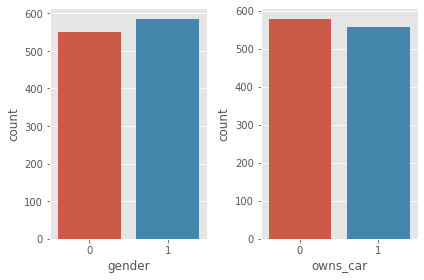

In [50]:
# we'll use the same count plots as we did earlier
fig, ax =plt.subplots(1,2)
sns.countplot(x='gender', data=Cluster_0, ax=ax[0])
sns.countplot(x='owns_car', data=Cluster_0, ax=ax[1])
plt.tight_layout()


fig.show()

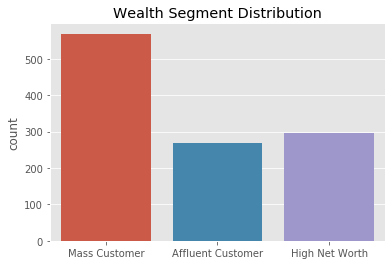

In [51]:
sns.countplot(x='wealth_segment', data=Cluster_0);
plt.title('Wealth Segment Distribution');
plt.xlabel(None);

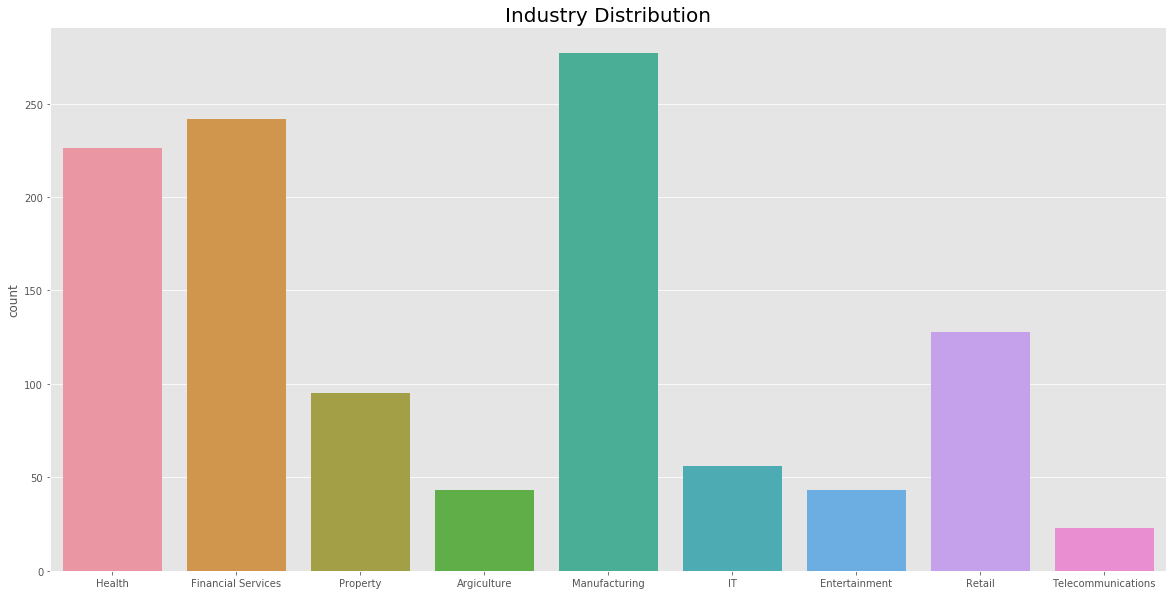

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(x='job_industry_category', data=Cluster_0);
plt.title('Industry Distribution',fontsize=20);
plt.xlabel(None);

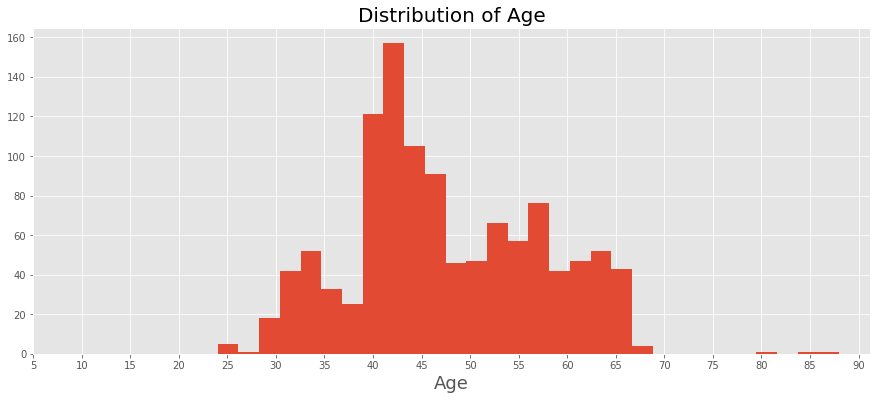

In [53]:
ticks=[]
for k in range(1,19):
    x=k*5
    ticks.append(x)
    
Cluster_0.hist('age', bins=30,figsize=(15,6));
plt.xticks(ticks)  # Set locations and labels
plt.title('Distribution of Age',fontsize=20);
plt.xlabel('xlabel', fontsize=18)
plt.xlabel('Age');

### As we can see, the distribution of data points across the categorical variables in the cluster is similar to the original data !<br><br>Age distribution in the cluster is perfect, since the majority of costumers from the original data have ages that range between 40 and 55.

### 1-3-3-Conclusion:<br><br>After all of the EDA on the customers data and modeling, we conclude that When importing the new customers dataset, we will chose a data segment that has similar stats to the blue cluster ! by targeting this segment, our client will have better chances of high return from their ad campaign.


## 2--Potential_New_Customers_Analysis

### 2-1- getting and cleaning data:

In [57]:
# getting and cleaning data
Potential_New_Customer_data=pd.read_csv("Cleaned_New_customers_data.csv")
Potential_New_Customer_data.drop('Unnamed: 0', axis = 1,inplace = True)
Potential_New_Customer_data['age'] = Potential_New_Customer_data['DOB'].apply(calculate_age)
Potential_New_Customer_data.drop('DOB', axis = 1,inplace = True)
Potential_New_Customer_data.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63
1,Morly,Genery,Male,69,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50
2,Ardelis,Forrester,Female,10,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46
3,Lucine,Stutt,Female,64,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41
4,Melinda,Hadlee,Female,34,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55


In [58]:
Potential_New_Customer_data.shape

(1000, 17)

In [59]:
Potential_New_Customer_data.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714,48.998000
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525,16.934662
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000,18.000000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531,37.000000
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000,49.000000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000,62.000000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750,82.000000


### 2-2- EDA

C:\Users\Ogawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


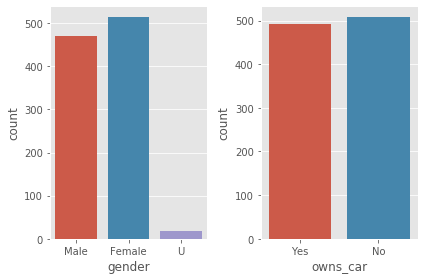

In [60]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='gender', data=Potential_New_Customer_data, ax=ax[0])
sns.countplot(x='owns_car', data=Potential_New_Customer_data, ax=ax[1])
plt.tight_layout()


fig.show()

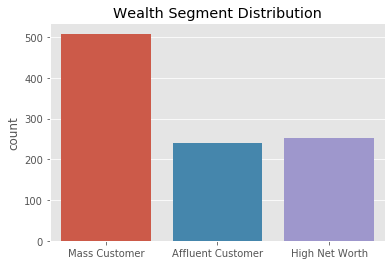

In [61]:
sns.countplot(x='wealth_segment', data=Potential_New_Customer_data);
plt.title('Wealth Segment Distribution');
plt.xlabel(None);

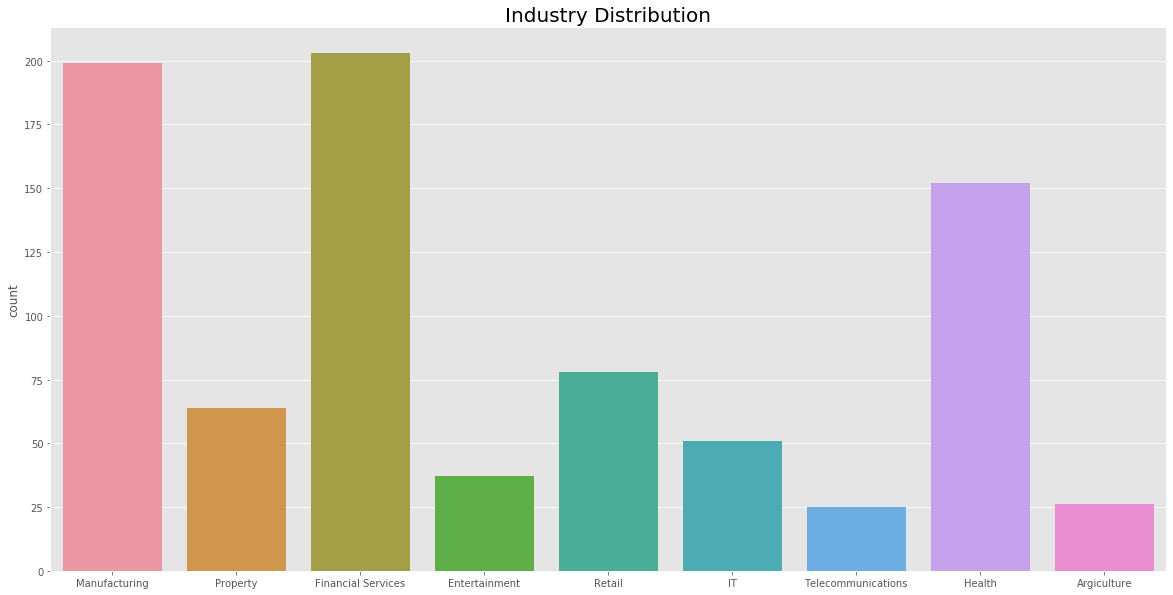

In [62]:
plt.figure(figsize=(20,10))
sns.countplot(x='job_industry_category', data=Potential_New_Customer_data);
plt.title('Industry Distribution',fontsize=20);
plt.xlabel(None);

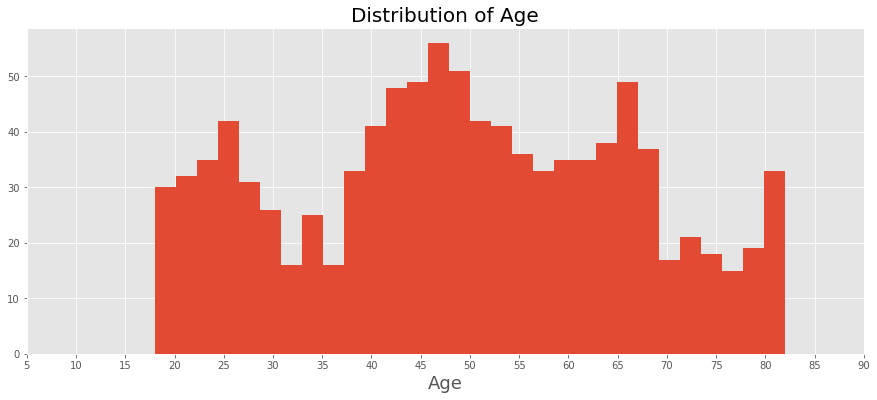

In [63]:
ticks=[]
for k in range(1,19):
    x=k*5
    ticks.append(x)
    
Potential_New_Customer_data.hist('age', bins=30,figsize=(15,6));
plt.xticks(ticks)  # Set locations and labels
plt.title('Distribution of Age',fontsize=20);
plt.xlabel('xlabel', fontsize=18)
plt.xlabel('Age');

### From the visualizations, we notice that this new dataset has the same characteristics as our original customers dataset , this is a geat starting point!<br><br>The distribution across catergorical variables is similar to the current customers data and to the blue cluster as well.<br><br> The majority of potential clients are aged between 35 and 60 , this is perfect!<br><br> All we have to do right now, is select a segment from this new data with the following propreties: <br> <br>------------>           1.  Age between 35 and 60. <br><br>------------>  2. A minimum of 40 for past_3_years_bike_related_purchases.	 

### 2-3- Selecting the segment

#### Let's start by selecting costumers with ages between 35 and 55, Then we'll use the describe function and see what we got !

In [64]:
Selected_new_customers = Potential_New_Customer_data[Potential_New_Customer_data['age'].between(35, 60, inclusive=True)]
Selected_new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
1,Morly,Genery,Male,69,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50
2,Ardelis,Forrester,Female,10,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46
3,Lucine,Stutt,Female,64,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41
4,Melinda,Hadlee,Female,34,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55
6,Rutledge,Hallt,Male,23,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,44


In [65]:
Selected_new_customers.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,age
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,49.920245,11.431493,3051.038855,7.425358,486.881391,0.895822,47.891616
std,28.140597,4.804787,857.011076,2.654074,290.641768,0.298587,6.716638
min,0.000000,0.000000,2009.000000,1.000000,1.000000,0.391000,35.000000
25%,26.000000,8.000000,2220.000000,6.000000,241.000000,0.656250,42.000000
50%,51.000000,11.000000,3029.000000,8.000000,485.000000,0.875500,47.000000
75%,73.000000,15.000000,3910.000000,9.000000,744.000000,1.087500,54.000000
max,99.000000,22.000000,4879.000000,12.000000,993.000000,1.718750,60.000000


#### Next, let's apply the past_3_years_bike_related_purchases filter and see what we got :


In [66]:
Selected_new_customers=Selected_new_customers[Selected_new_customers['past_3_years_bike_related_purchases'].between(40, 100, inclusive=True)]
Selected_new_customers.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,age
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,68.966443,11.476510,3059.949664,7.416107,483.164430,0.898436,47.899329
std,16.743828,4.802614,860.310860,2.714472,285.912403,0.293613,6.732748
min,40.000000,0.000000,2010.000000,1.000000,1.000000,0.399500,35.000000
25%,55.000000,8.000000,2223.000000,6.000000,248.250000,0.669375,42.000000
50%,69.000000,11.000000,3029.000000,8.000000,484.500000,0.875781,47.000000
75%,83.000000,15.750000,3927.250000,9.000000,725.000000,1.077539,54.000000
max,99.000000,22.000000,4817.000000,12.000000,988.000000,1.718750,60.000000


### Let's do some EDA on the Selected new customers: 

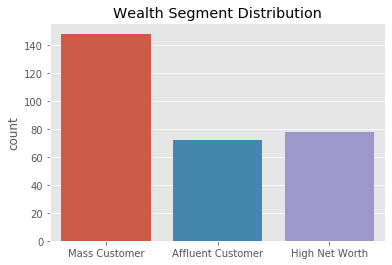

In [67]:
sns.countplot(x='wealth_segment', data=Selected_new_customers);
plt.title('Wealth Segment Distribution');
plt.xlabel(None);

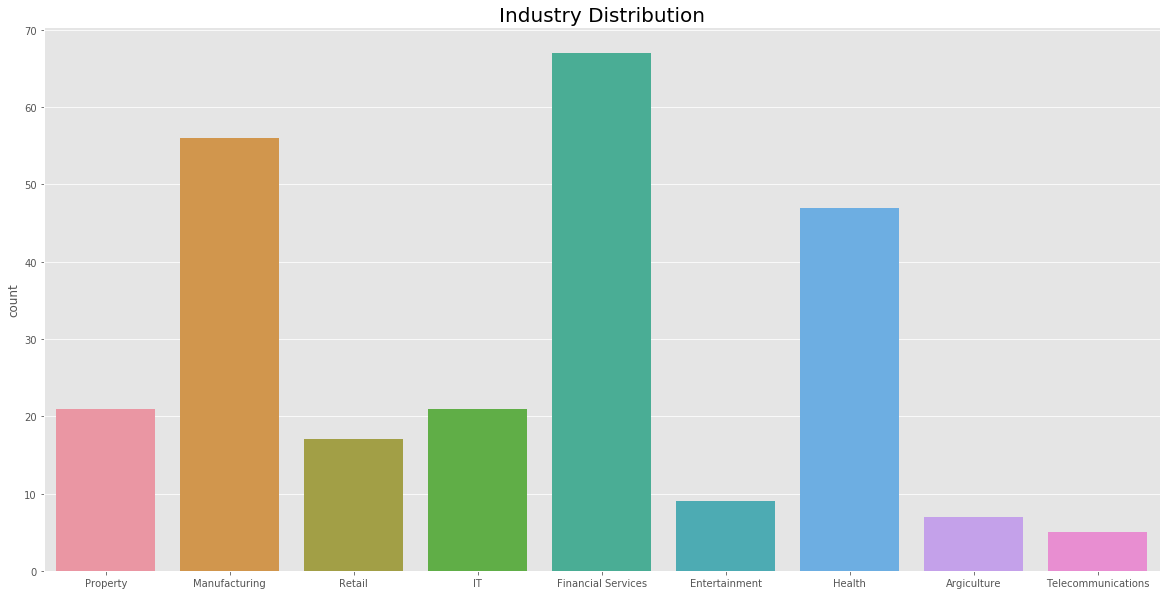

In [68]:
plt.figure(figsize=(20,10))
sns.countplot(x='job_industry_category', data=Selected_new_customers);
plt.title('Industry Distribution',fontsize=20);
plt.xlabel(None);

C:\Users\Ogawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


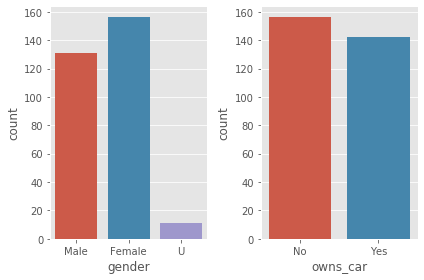

In [69]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='gender', data=Selected_new_customers, ax=ax[0])
sns.countplot(x='owns_car', data=Selected_new_customers, ax=ax[1])
plt.tight_layout()


fig.show()

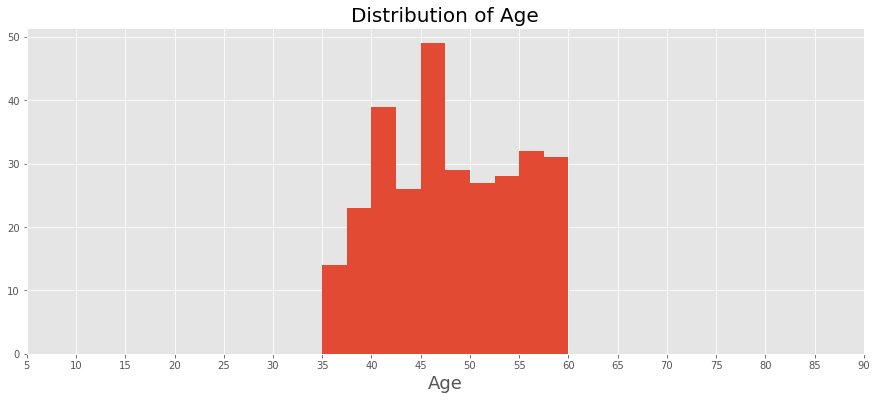

In [70]:
ticks=[]
for k in range(1,19):
    x=k*5
    ticks.append(x)
    
Selected_new_customers.hist('age', bins=10,figsize=(15,6));
plt.xticks(ticks)  # Set locations and labels
plt.title('Distribution of Age',fontsize=20);
plt.xlabel('xlabel', fontsize=18)
plt.xlabel('Age');

### This is a perfect segment for our ad campaign! <br><br>The distribution of data points across the categorical variables is similar to the current customers data and the age distribution looks good.<br><br>As we can see from the stats earlier, this segment has a minimum of 40 in past_3y_b with a lower quartile of 55, a median equals to 69 and an upper quartile of 83. For age, it  ranges from 35 to 60, with the majority of the customers having ages between 37 and 57 !

### Let's save this segment as csv, it will be that target of the future ad campaign.

In [71]:
Selected_new_customers.to_csv('Selected_new_customers.csv')